In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
# Load the dataset
df = pd.read_csv('big_data_sys/cw_2/road_traffic_deaths.csv')
df_filtered = df[(df['Year'] >= 1990) & (df['Year'] <= 2019)]
global_deaths = df_filtered.groupby('Year')['Deaths'].sum().reset_index()
print(df_filtered.head())

   Index      Country Code  Year  Deaths  Sidedness
0      0  Afghanistan  AFG  1990    4154          0
1      1  Afghanistan  AFG  1991    4472          0
2      2  Afghanistan  AFG  1992    5106          0
3      3  Afghanistan  AFG  1993    5681          0
4      4  Afghanistan  AFG  1994    6001          0


# Visualize the trend of deaths over the years globally
- Aggregate the data globally by summing deaths per year

Visualization:

We first visualize the trend of global road deaths over the years using Seaborn's line plot. This shows the overall pattern of how deaths have increased or decreased globally.

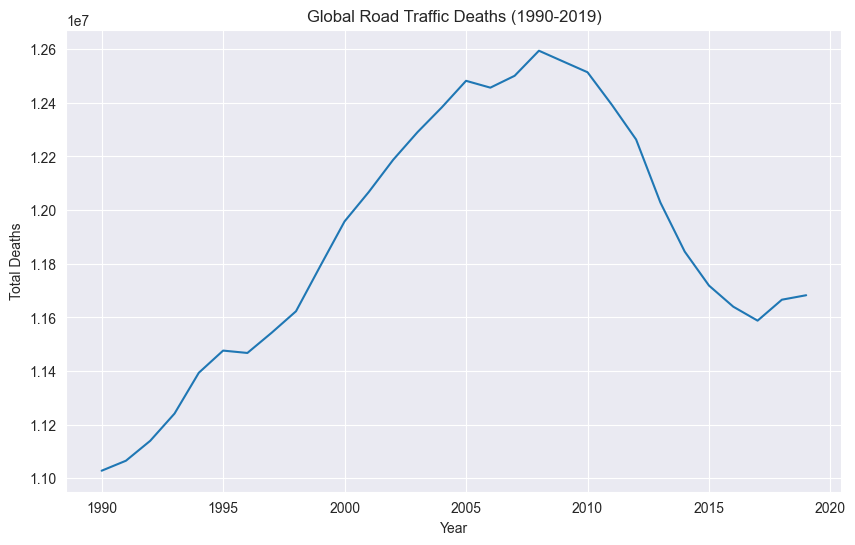

In [10]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_deaths, x='Year', y='Deaths')
plt.title('Global Road Traffic Deaths (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

# Predict the future deaths using Linear Regression (Predicting 2020-2025)
- Prepare the data for linear regression

Prediction:
We use Linear Regression from Scikit-learn to predict future deaths (2020–2025) based on historical data from 1990 to 2019. The model fits the data and makes predictions.

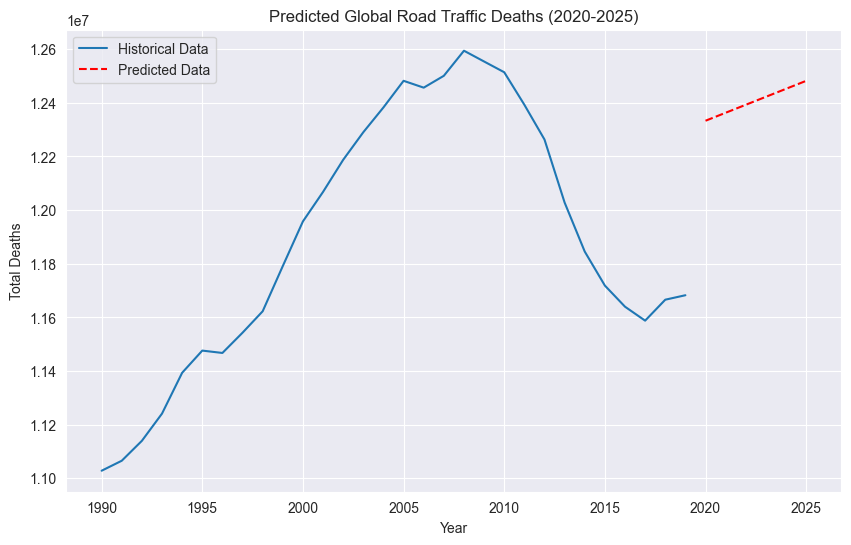

In [11]:
X = global_deaths['Year'].values.reshape(-1, 1)  # Feature: Year
y = global_deaths['Deaths'].values  # Target: Deaths

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict future deaths for the years 2020-2025
future_years = np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
future_deaths = model.predict(future_years)

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_deaths, x='Year', y='Deaths', label='Historical Data')
sns.lineplot(x=future_years.flatten(), y=future_deaths, label='Predicted Data', linestyle='--', color='red')
plt.title('Predicted Global Road Traffic Deaths (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend()
plt.show()

# How IoT Can Make a Difference
- Let's assume IoT can reduce deaths by 10% annually, and show the impact:

Impact of IoT:

The system assumes that IoT could reduce road deaths by 10% annually. To simulate this impact, the predicted deaths for the years 2020-2025 are reduced by 10% and plotted. This demonstrates how IoT could help lower deaths by improving driver behavior, monitoring speed, and sending immediate alerts to emergency services.


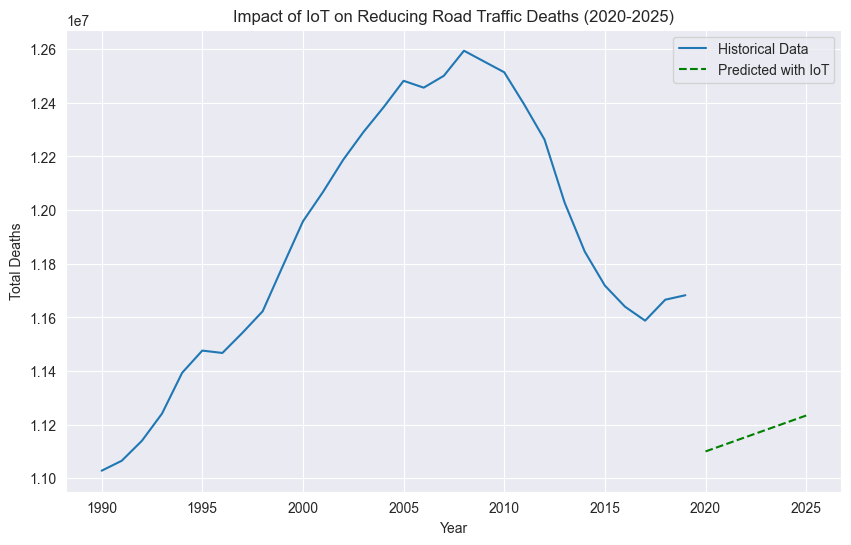

Predicted Deaths Without IoT (2020-2025): [12333192.18812478 12362960.36134092 12392728.53455705 12422496.70777319
 12452264.88098931 12482033.05420545]
Predicted Deaths With IoT (2020-2025): [11099872.9693123  11126664.32520683 11153455.68110135 11180247.03699587
 11207038.39289038 11233829.7487849 ]


In [12]:
# Calculate the reduced deaths with IoT implementation (10% annual reduction)
reduced_deaths = future_deaths * 0.9

# Plot the impact of IoT in reducing road deaths
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_deaths, x='Year', y='Deaths', label='Historical Data')
sns.lineplot(x=future_years.flatten(), y=reduced_deaths, label='Predicted with IoT', linestyle='--', color='green')
plt.title('Impact of IoT on Reducing Road Traffic Deaths (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend()
plt.show()

# Print the predicted deaths without and with IoT
print("Predicted Deaths Without IoT (2020-2025):", future_deaths)
print("Predicted Deaths With IoT (2020-2025):", reduced_deaths)

## Results:

### You get two graphs:
* One showing the historical death data and predictions for the coming years (2020-2025).
* Another showing the projected deaths with a 10% reduction due to IoT's implementation.


## Discussion on IoT's Impact:
* IoT Impact on Road Safety: IoT systems can play a significant role in reducing road fatalities. IoT technologies can detect over-speeding, monitor vehicle conditions, and alert emergency responders in real-time. By automating such processes and reducing human error, these systems can save lives, improve response times, and ultimately lead to safer roads.
* Prediction Accuracy: The prediction model used here (Linear Regression) is a simple approach, and while it can give us a basic forecast, more sophisticated methods, such as time-series analysis or deep learning, could provide more accurate predictions. Additionally, real-time data collected by IoT devices could help refine these predictions in future.


## Next Steps:
* Advanced Models: Implementing more complex machine learning models like Time-Series Forecasting or Random Forest could improve the prediction accuracy.
* Data Expansion: Incorporating more features (e.g., weather conditions, traffic volume, or vehicle types) would improve the robustness of the model.
* Geospatial Analysis: You could also introduce a spatial component to analyze road safety by country or region, identifying areas with the highest risk.

